In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
cd '/content/drive/My Drive/CSCE_689/'

/content/drive/My Drive/CSCE_689


In [0]:
# Load input files from  
import numpy as np
import pandas as pd
labels=pd.read_csv('Labels_final.csv',header=None)
features=pd.read_csv('Features_final.csv',header=None)

In [4]:
features.shape

(2624, 5)

In [0]:
df_features=pd.DataFrame.from_records(features)
df_features["Y"]=labels.loc[:,2]

In [6]:
df_features['label']=labels.iloc[:,0]
df_features.head()

,0,1,2,3,4,Y,label
0,0.216,0.460,0.383,2.13,1.20,0,0
1,0.134,0.401,0.236,2.99,1.22,0,0
2,0.132,0.431,0.267,3.27,1.24,0,0
3,0.230,0.680,0.406,2.95,1.14,0,0
4,0.195,0.303,0.381,1.56,1.23,0,0


In [0]:
feature_mean=df_features[df_features['Y']==0].groupby('label').mean()
feature_std=df_features[df_features['Y']==0].groupby('label').std()

In [0]:
## Normalize the dataframe with mean and standard deviation and add to the input feature
df_normalised=df_features.apply(lambda x: (x[0:5]-feature_mean.loc[x['label']])/feature_std.loc[x['label']],axis=1)
# df_normalised.head()

In [9]:
df=pd.merge(df_normalised,df_features,left_index=True,right_index=True)
# df=df_features
df.head()

,0_x,1_x,2_x,3_x,4_x,Y_x,0_y,1_y,2_y,3_y,4_y,Y_y,label
0,0.958314,-0.626852,0.773877,-0.614034,0.330169,NaN,0.216,0.460,0.383,2.13,1.20,0,0
1,-0.213892,-1.087716,-1.241803,-0.455127,0.752786,NaN,0.134,0.401,0.236,2.99,1.22,0,0
2,-0.242482,-0.853378,-0.816727,-0.403389,1.175402,NaN,0.132,0.431,0.267,3.27,1.24,0,0
3,1.158446,1.091621,1.089256,-0.462518,-0.937680,NaN,0.230,0.680,0.406,2.95,1.14,0,0
4,0.658115,-1.853218,0.746453,-0.719356,0.964094,NaN,0.195,0.303,0.381,1.56,1.23,0,0


In [0]:
df['label']=labels.loc[:,2]
df['timestamp']=labels.iloc[:,1]
df['video_label']=labels.iloc[:,0]
df=df.drop(['Y_y', 'Y_x'],axis=1) # 8 inputs

In [0]:
## Train-validation split
train_percentage = 20/24
train_index = int(len(df)*train_percentage)
test_index = len(df)-train_index

In [12]:
df.to_numpy().reshape(int(df.shape[0]/2),2,13)
# df.shape

array([[[  0.95831376,  -0.62685238,   0.7738771 , ...,   0.        ,
           0.        ,   0.        ],
        [ -0.21389177,  -1.08771581,  -1.24180279, ...,   0.        ,
           0.5       ,   0.        ]],

       [[ -0.24248215,  -0.85337848,  -0.81672744, ...,   0.        ,
           1.        ,   0.        ],
        [  1.15844641,   1.09162144,   1.08925558, ...,   0.        ,
           1.5       ,   0.        ]],

       [[  0.65811478,  -1.85321779,   0.74645288, ...,   0.        ,
           3.        ,   0.        ],
        [  0.44368694,   1.35720375,   0.4310744 , ...,   0.        ,
           3.5       ,   0.        ]],

       ...,

       [[ -2.40535118,  -0.82010968,  -0.59591706, ...,   1.        ,
           6.5       ,  41.        ],
        [-20.04459314,  -0.4533899 ,  -2.35883835, ...,   1.        ,
           7.        ,  41.        ]],

       [[  0.26726124,   1.49643715,   1.06768473, ...,   0.        ,
           9.        ,  41.        ],
       

In [0]:
df_train = df[:train_index]
df_test = df[-test_index:]

In [0]:
x_test = df_test.drop(["label","timestamp","video_label"],axis=1)
y_test = df_test["label"]
test_timestamp=df_test["timestamp"]
test_video_label=df_test["video_label"]

In [18]:
x_train = df_train.drop(['label',"timestamp","video_label"],axis=1)
y_train = df_train['label']
train_timestamp=df_train["timestamp"]
train_video_label=df_train["video_label"]
np.where(np.asanyarray(np.isnan(x_train)))


(array([], dtype=int64), array([], dtype=int64))

In [19]:
x_train.shape

(2186, 10)

In [20]:
x_test.shape

(438, 10)

In [0]:
import numpy as np
x_shaped_train  = np.array(x_train).reshape(int(x_train.shape[0]/2),2,10)
x_shaped_test  = np.array(x_test).reshape(int(x_test.shape[0]/2),2,10)

In [22]:
x_shaped_train.shape

(1093, 2, 10)

In [23]:
y_train = np.array(y_train).astype('float')
y_test = np.array(y_test).astype('float')
# y_test=y_test[:-1]
y_shaped_train  = []
for i in range(0, len(y_train), 2):
  y_shaped_train.append(y_train[i])
print(len(y_shaped_train))

y_shaped_test  = []
for i in range(0, len(y_test), 2):
  y_shaped_test.append(y_test[i])
print(len(y_shaped_test))

1093
219


In [24]:
y_shaped_train = np.array(y_shaped_train)
y_shaped_train.shape

(1093,)

In [25]:
y_shaped_test = np.array(y_shaped_test)
y_shaped_test.shape

(219,)

In [91]:
x_shaped_test.shape

(219, 2, 10)

In [30]:
!pip install keras_self_attention

  Created wheel for keras-self-attention: filename=keras_self_attention-0.42.0-cp36-none-any.whl size=17296 sha256=de7bc7d668f17bbe94ca963fff4bbe3559cc75d2dbfb48e3cdaa094165871174
  Stored in directory: /root/.cache/pip/wheels/7b/05/a0/99c0cf60d383f0494e10eca2b238ea98faca9a1fe03cac2894
Successfully built keras-self-attention


In [0]:
import numpy as np
from keras.utils import to_categorical
from keras.layers import Dense, Flatten, Dropout, ZeroPadding3D, Bidirectional
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import TimeDistributed
from keras.layers.convolutional import (Conv2D, MaxPooling3D, Conv3D,
    MaxPooling2D)
from collections import deque
import sys
from keras.utils import plot_model
import keras
from IPython.display import clear_output
from keras import losses
from keras.callbacks import LearningRateScheduler

import tensorflow.keras.backend as K
from keras_self_attention import SeqSelfAttention
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import numpy

In [0]:
## Define Callback function to plot
class PlotLearning(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
        
        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.legend()
        
        plt.show();
        
plotss = PlotLearning()

In [0]:
## Define Model
metrics = ['accuracy']
learning_rate=0.001
batch_size=64
optimizer = Adam(lr=learning_rate)
def create_model(learning_rate=learning_rate,batch_size=batch_size,init_mode='uniform'):
  model = Sequential()
  model.add(Dense(128, activation='sigmoid',kernel_initializer=init_mode))
  model.add(SeqSelfAttention(attention_activation='sigmoid'))
  model.add(Bidirectional(LSTM(64, return_sequences=True,input_shape=(2,10,),dropout=0.5)))

  model.add(Flatten())
  model.add(Dense(32, activation='relu',kernel_initializer=init_mode)) #FC2
  model.add(Dropout(0.5))
  model.add(Dense(4, activation='tanh',kernel_initializer=init_mode))#FC3
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))#Output Layer
  optimizer = Adam(lr=learning_rate)
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)

  return model



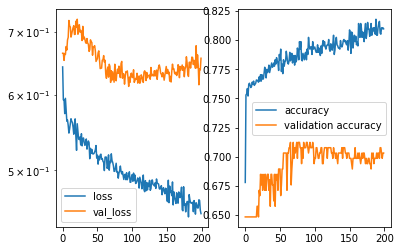

CPU times: user 2min 27s, sys: 3.03 s, total: 2min 30s
Wall time: 10min 58s


In [73]:
## Using cross valdiation to grid search best weight initializer
%%time
## Try different weight initialization
seed = 7
numpy.random.seed(seed)
batch_size = 128
epochs = 200

model_CV = KerasClassifier(build_fn=create_model, epochs=epochs, 
                           batch_size=batch_size, verbose=1)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform']
batches = 128
learning_rate=0.0001
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_shaped_train, y_shaped_train,epochs=epochs, batch_size=batch_size, validation_data = (x_shaped_test,y_shaped_test), 
                   callbacks=[plotss],verbose=1)

In [74]:
# print results
print(f'Best Accuracy for {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.7812910768013004 using {'init_mode': 'lecun_uniform'}
 mean=0.7749, std=0.04398 using {'init_mode': 'uniform'}
 mean=0.7813, std=0.04311 using {'init_mode': 'lecun_uniform'}
 mean=0.7703, std=0.0417 using {'init_mode': 'normal'}
 mean=0.763, std=0.04982 using {'init_mode': 'zero'}
 mean=0.7676, std=0.04405 using {'init_mode': 'glorot_normal'}
 mean=0.7685, std=0.0496 using {'init_mode': 'glorot_uniform'}


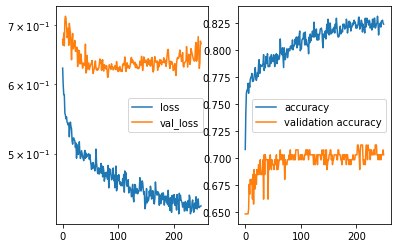

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 2, 128)            1408      
_________________________________________________________________
seq_self_attention_16 (SeqSe (None, 2, 128)            8257      
_________________________________________________________________
bidirectional_16 (Bidirectio (None, 2, 128)            98816     
_________________________________________________________________
flatten_16 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 32)                8224      
_________________________________________________________________
dropout_31 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_64 (Dense)             (None, 4)               

In [95]:
## Running optimal model (parameters found after repeatedly iterating manually)
%%time
metrics = ['accuracy']
model=create_model(batch_size=64,init_mode='lecun_uniform',learning_rate=10^-6)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)
callback=model.fit(x_shaped_train, y_shaped_train,epochs=250, batch_size=batch_size, validation_data = (x_shaped_test,y_shaped_test), 
                   callbacks=[plotss],verbose=1)
model.summary()

In [80]:
## Prediction, Accuracy, F1-score, ROC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

pred_rnn = model.predict_classes(x_shaped_test,batch_size)
y_score_10 = model.predict_proba(x_shaped_test,batch_size)
acc10 = accuracy_score(y_shaped_test, pred_rnn)
f1_score_10 = metrics.f1_score(y_shaped_test, np.array(pred_rnn),average='micro')
roc_10 = metrics.roc_auc_score(y_shaped_test, y_score_10)
print([acc10, f1_score_10, roc_10])
print(confusion_matrix(y_shaped_test, pred_rnn))

[0.7123287671232876, 0.7123287671232877, 0.6313334552771173]
[[142   0]
 [ 63  14]]


In [0]:
## Multiplying predicted labels into 2 to match for each timeframe
pred=np.array([pred_rnn[i//2] for i in range(len(pred_rnn)*2)]) 


In [0]:
## Plotting time-label graph for each of the validation videos
plot_df=pd.DataFrame()
plot_df["label"]=test_video_label
plot_df["time"]=test_timestamp
plot_df["pred"]=pred

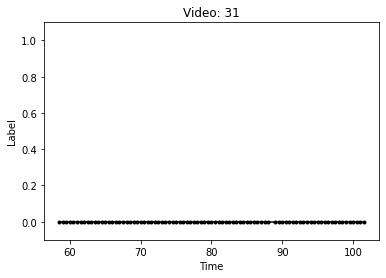

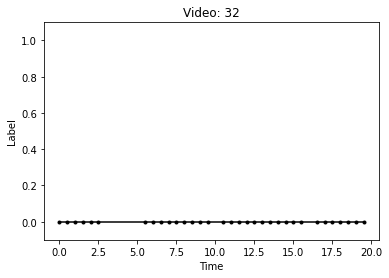

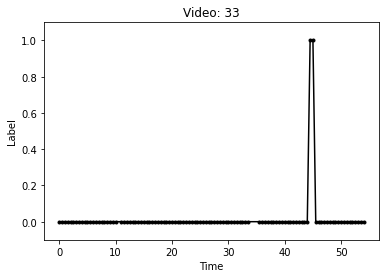

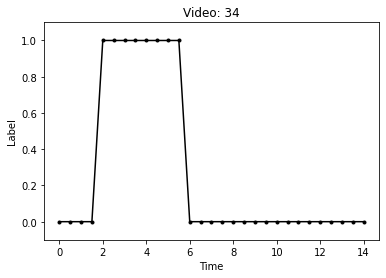

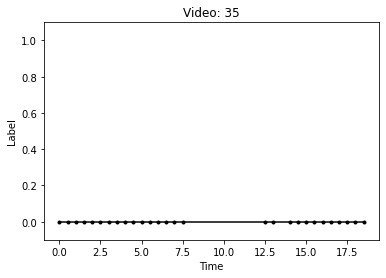

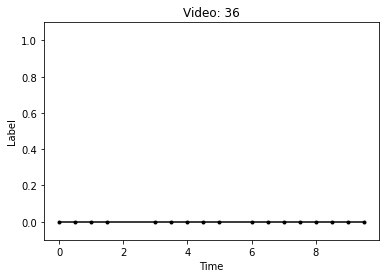

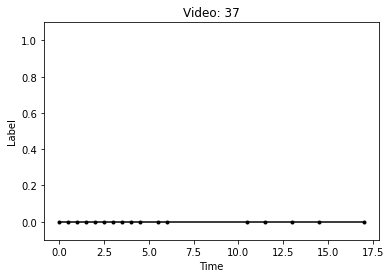

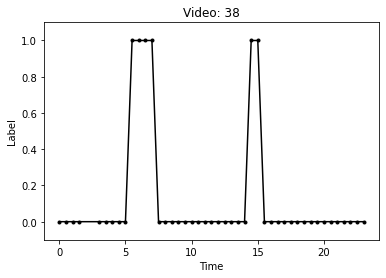

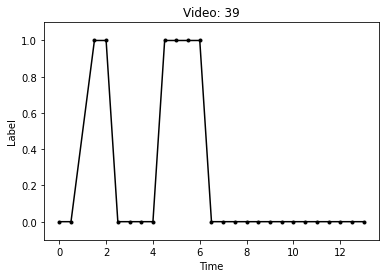

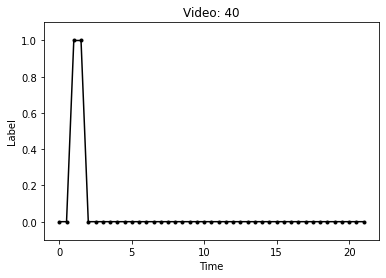

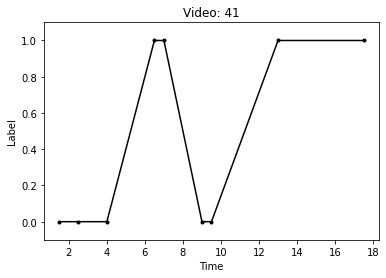

In [83]:
listed=(list(plot_df.groupby("label")))
for i in listed:
    fig = plt.figure()
    plt.plot(i[1].loc[:,'time'],i[1].loc[:,'pred'],marker = '.', color = "Black")
    plt.title("Video: "+str(i[0]))
    plt.xlabel("Time")
    plt.ylabel("Label")
    plt.ylim(-0.1,1.1)
    plt.show()
    json_save=i[1].iloc[:,1:2]
    json_save.to_json('timeLabel: ' +str(i[0])+ ".json")
  

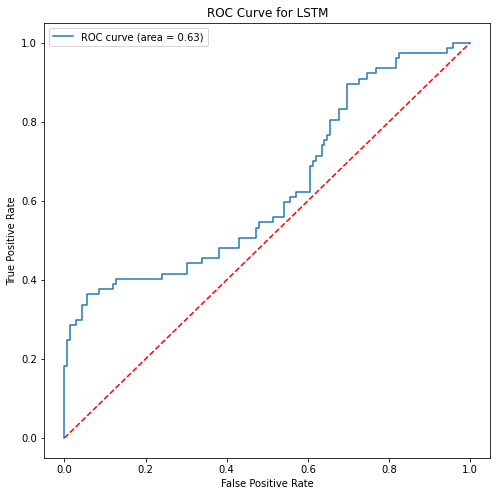

In [84]:
## Check ROC for the data
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1],'r--')
fpr, tpr, thresholds = roc_curve(y_shaped_test, y_score_10)
plt.plot(fpr, tpr, label= 'ROC curve (area = %0.2f)' % roc_10)
plt.title('ROC Curve for LSTM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

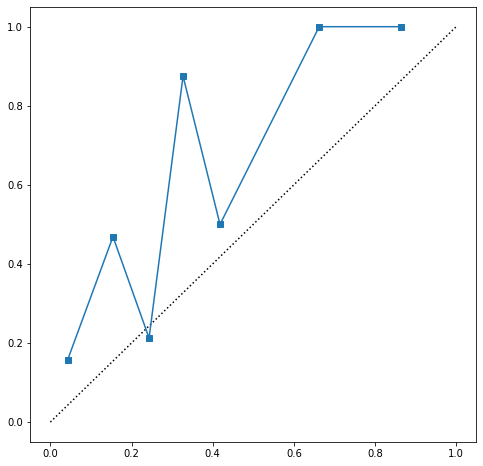

In [85]:
## Calibration curve
from sklearn.calibration import calibration_curve
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value=calibration_curve(y_shaped_test,y_score_10,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'LSTM')

In [86]:
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
